In [2]:
import pandas as pd
fire_data = pd.read_csv('/Users/maggiehuang/Desktop/INSY662_Data_Mining_and_Visualization_for_Analytic/INSY662-Data-Mining-and-Visualization-Project/Fire_Incidents_Data_Imputed.csv')

# 1. Split Data

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Separate target variable and features
X = fire_data.drop(columns=['Estimated_Dollar_Loss'])
y = fire_data['Estimated_Dollar_Loss']

# Encode categorical variables
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].astype(str))  # Convert to string to handle any non-categorical object types

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# 2. Random Forest Regressor for Predicting 'Estimated_Dollar_Loss'

In [22]:
# Initialize Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [20, 35, 50],
    'min_samples_split': [3, 5, 7],
    'min_samples_leaf': [3, 5, 7]
}

# Perform GridSearch with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Retrieve best parameters and compute RMSE
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation RMSE:", np.sqrt(-grid_search.best_score_))

# Retrieve feature importances
feature_importances = grid_search.best_estimator_.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 7, 'min_samples_split': 3, 'n_estimators': 200}
Best Cross-Validation RMSE: 198438.63911054953
Cross-Validation RMSE (with best params): Mean = 195206.4076806786 , Std Dev = 35670.04194631159
Feature Importances:
                                              Feature  Importance
17                     Number_of_responding_personnel    0.803718
2                                     Business_Impact    0.027061
7                                      Extent_Of_Fire    0.022731
23                          Status_of_Fire_On_Arrival    0.018991
26                                     Geo_Coordinate    0.017508
12                              Incident_Station_Area    0.014420
0                                      Area_of_Origin    0.013006
25                                  TFS_Response_Time    0.012216
19                                       Property_Use    0.011883
5               Estimated_Number_Of_Persons_Displaced    0.008738
21    

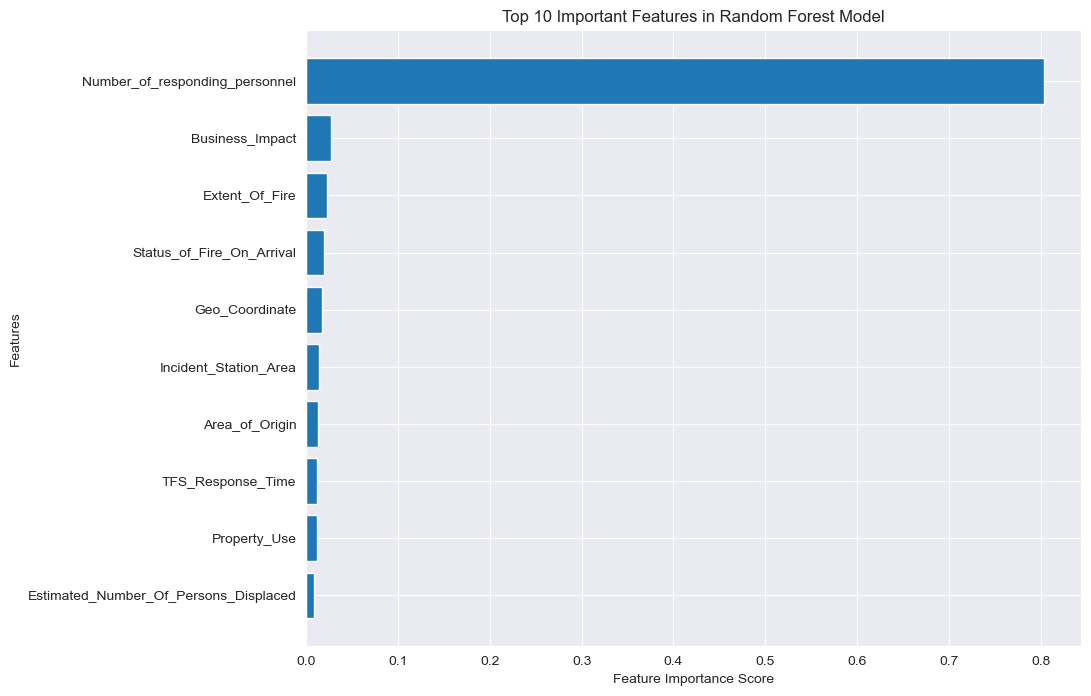

In [23]:
# Plotting Feature Importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'][:10][::-1], feature_importance_df['Importance'][:10][::-1])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features in Random Forest Model")
plt.show()

# 3. Gradient Boosting Regressor for Predicting 'Estimated_Dollar_Loss'


In [4]:
# Initialize Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [75, 100, 200],
    'max_depth': [20, 35, 55],
    # 'learning_rate': [0.01, 0.1, 0.2],  # it's taking too long to tune lol
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [3, 5, 7]
}

# Perform GridSearch with cross-validation
grid_search = GridSearchCV(gbr, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Retrieve best parameters and compute RMSE
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation RMSE (GridSearchCV):", np.sqrt(-grid_search.best_score_))

# Retrieve feature importances
feature_importances = grid_search.best_estimator_.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 7, 'min_samples_split': 3, 'n_estimators': 100}
Best Cross-Validation RMSE (GridSearchCV): 214191.66523869426
Cross-Validation RMSE (with best params): Mean = 205285.8885062352 , Std Dev = 61120.97379730159
Feature Importances:
                                              Feature  Importance
17                     Number_of_responding_personnel    0.575364
26                                     Geo_Coordinate    0.062717
7                                      Extent_Of_Fire    0.048957
6                         Ext_agent_app_or_defer_time    0.033171
10                            Fire_Under_Control_Time    0.031616
25                                  TFS_Response_Time    0.031088
14                           Last_TFS_Unit_Clear_Time    0.029907
2                                     Business_Impact    0.026499
19                                       Property_Use    0.022914
12                              Incident_Station_Area    

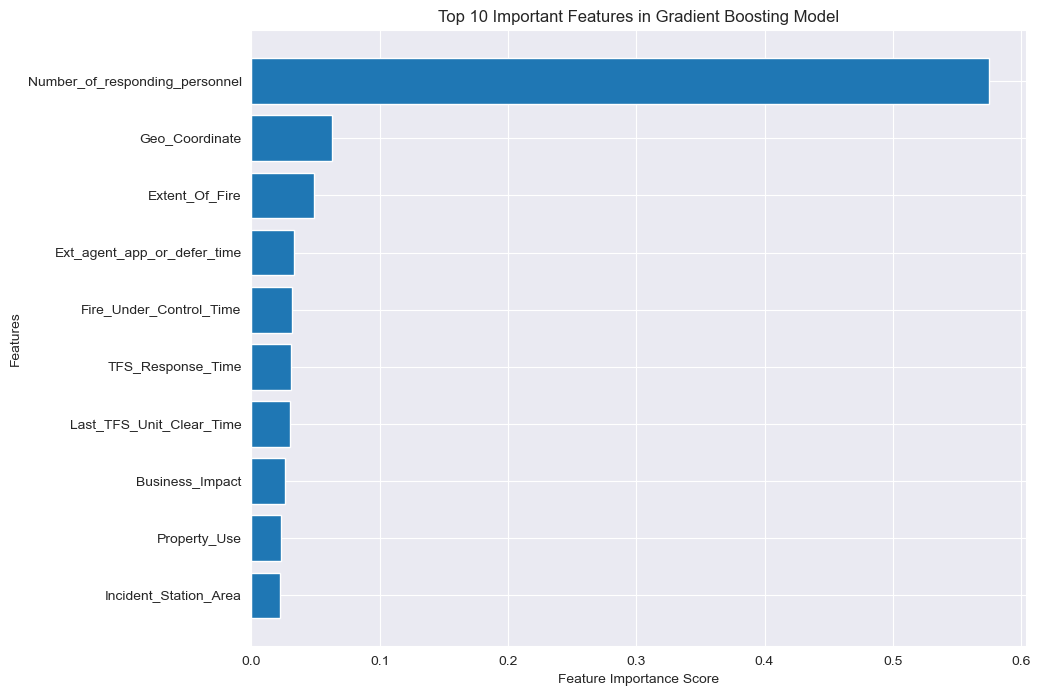

In [5]:
# Plotting Feature Importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'][:10][::-1], feature_importance_df['Importance'][:10][::-1])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features in Gradient Boosting Model")
plt.show()